In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [224]:
#read data & ubah convert ke datetime
df = pd.read_csv("SBAnational.csv", parse_dates=['ApprovalDate', 'DisbursementDate'])
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaN,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaN,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaN,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaN,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaN,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


# 1. Descriptive Statistics

In [225]:
pd.set_option('display.max_columns',100)
df.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
357344,3489904003,IRRIPO INC,OGDEN,UT,84403,ZIONS FIRST NATIONAL BANK,UT,561730,1999-12-22,2000,60,10,1.0,2,10,1,1,0,N,29-Aug-03,2000-01-31,"$35,500.00",$0.00,CHGOFF,"$5,910.00","$47,000.00","$23,500.00"
507299,4910513007,DOUGLAS ELECTRONICS INC,CORPUS CHRISTI,TX,78401,INTERNATIONAL BANK OF COMMERCE,TX,421690,1992-07-01,1992,84,15,1.0,0,0,1,0,N,N,NaN,1992-07-31,"$410,000.00",$0.00,P I F,$0.00,"$410,000.00","$328,000.00"
846311,9074693000,"BRILL METAL WORKS, INC. ETAL",MEDFORD,OR,97501,JPMORGAN CHASE BANK NATL ASSOC,OR,0,1996-03-08,1996,120,14,1.0,0,0,1,0,N,N,NaN,1996-12-31,"$166,000.00",$0.00,P I F,$0.00,"$166,000.00","$124,500.00"
462812,4473344001,BELGRADE DRUG & HARDWARE,BELGRADE,MN,56312,NORTH AMERICAN STATE BANK,MN,446110,2001-04-30,2001,180,5,1.0,0,0,1,2,N,N,NaN,2001-07-31,"$415,000.00",$0.00,P I F,$0.00,"$415,000.00","$311,250.00"
360537,3513836010,Barrett Donald Willis.,LENA,MS,39094,FIRST FINANCIAL BANK,AR,112320,2008-10-28,2009,130,2,1.0,0,2,1,0,0,N,25-Apr-14,2008-11-30,"$33,000.00",$0.00,CHGOFF,"$24,768.00","$33,000.00","$28,050.00"


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

#### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

- **Terdapat banyak column yang harus diubah type datanya antara lain** :
1. NAICS <br>
   Perubahan type data yang awalnya **int** menjadi **object**
2. ApprovalDate <br>
   Perubahan type data yang awalnya **object** menjadi **datetime**
3. ApprovalFY <br>
   Perubahan type data yang awalnya **object** menjadi **int**
4. ChgOffPrinGr <br>
   Perubahan type data yang awalnya **object** menjadi **int**
5. DisbursementDate <br>
   Perubahan type data yang awalnya **object** menjadi **datetime**
6. DisbursementGross <br>
   Perubahan type data yang awalnya **object** menjadi **int**
7. BalanceGross<br>
   Perubahan type data yang awalnya **object** menjadi **int**
8. GrAppv <br>
   Perubahan type data yang awalnya **object** menjadi **int**
9. SBA_Appv <br>
   Perubahan type data yang awalnya **object** menjadi **int**

Sehingga total kolom yang dilakukan perubahan type adalah sebanyak 9 kolom

- **Isi kolom yang tidak sesuai**

**1. Kolom "ApprovalFY"**

In [227]:
#Ubah ApprovalFY ke Interger
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [228]:
def change_year(x):
    if x['ApprovalFY'] == '1976A':
        return 1976
    else:
        return int(x['ApprovalFY'])
    
df['ApprovalFY'] = df.apply(change_year,axis=1)

In [229]:
#Ubah ApprovalFY ke Interger
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971], dtype=int64)

**Keterangan** : <br>
Untuk value data di kolom ApprovalFY terdapat kesalahan yaitu:

- Value tidak semua bertipe int ada beberapa data yang bertype string <br>
  hal ini ditandai oleh adanya input (1976A, ' '), sehingga perlu di convert ke bentuk integer <br> 

**2. Kolom ("DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv")**

In [230]:
df[["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...
899159,"$70,000.00",$0.00,$0.00,"$70,000.00","$56,000.00"
899160,"$85,000.00",$0.00,$0.00,"$85,000.00","$42,500.00"
899161,"$300,000.00",$0.00,$0.00,"$300,000.00","$225,000.00"
899162,"$75,000.00",$0.00,"$46,383.00","$75,000.00","$60,000.00"


**Keterangan** : <br>
Value dari kolom diatas masih berbentuk type "object", hal ini ditandai dengan adanya value yang mengandung tanda($) dan (,). Sehingga, untuk tahap selanjutnya akan dilakukan perubahan type value tersebut sesuai dengan type yang benar.

In [231]:
def remove_sign(item):
        new = item.replace('$','')
        new2 = new.replace(' ','')
        new3 = new2.replace(',','')
        return float(new3)

df['DisbursementGross'] = df['DisbursementGross'].apply(lambda x : remove_sign(x))
df['BalanceGross'] = df['BalanceGross'].apply(lambda x : remove_sign(x))
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(lambda x : remove_sign(x))
df['GrAppv'] = df['GrAppv'].apply(lambda x : remove_sign(x))
df['SBA_Appv'] = df['SBA_Appv'].apply(lambda x : remove_sign(x))

In [232]:
df[["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0
...,...,...,...,...,...
899159,70000.0,0.0,0.0,70000.0,56000.0
899160,85000.0,0.0,0.0,85000.0,42500.0
899161,300000.0,0.0,0.0,300000.0,225000.0
899162,75000.0,0.0,46383.0,75000.0,60000.0


**Keterangan** : <br>
Value pada kolom telah diubah ke bentuk yang benar, karena sudah berbentuk float tidak lagi dalam bentuk object.

**3. Kolom NAICS** :

In [233]:
df['NAICS'].value_counts()

0         201948
722110     27989
722211     19448
811111     14585
621210     14048
           ...  
927110         1
327410         1
314992         1
922110         1
325192         1
Name: NAICS, Length: 1312, dtype: int64

**Keterangan** : <br>
Terdapat values yang kurang sesuai yaitu nilai "0" dan kami hanya mengambil digit berdasarkan sektor industri.

> sumber : https://www.naics.com/search/

In [234]:
# -- Change naics code to 2 digit
temp = []
for item in df['NAICS']:
    if item == 0 :
        temp.append(0)
    else :
        a = list(str(item))[:2]
        b = ''.join(a)
        temp.append(b)

df['NAICS'] = temp


# -- Drop NAICS = 0
index_naics = []
for item in list(df[df['NAICS'] == 0].index):
    index_naics.append(item)

df.drop(index_naics,inplace=True)

In [235]:
df['NAICS'] = df['NAICS'].map({
    '11': 'Agriculture / Forestry / Fishing / Hunting',
    '21': 'Mining / Quarrying / Oil&Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation / Warehousing',
    '49': 'Transportation / Warehousing',
    '51': 'Information',
    '52': 'Finance / Insurance',
    '53': 'Real Estate / Rental / Leasing',
    '54': 'Proffesional / Scientific / Tech.Service',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative & Support / Waste Management / Remediation Services',
    '61': 'Educational',
    '62': 'Health Care / Social Assistance',
    '71': 'Arts / Entertainment / Recreation',
    '72': 'Accomodation / Food Services',
    '81': 'Other Services (except public admin)',
    '92': 'Public Administration'
})

In [236]:
df['NAICS'].value_counts()

Retail trade                                                          127251
Other Services (except public admin)                                   72618
Proffesional / Scientific / Tech.Service                               68170
Manufacturing                                                          68029
Accomodation / Food Services                                           67600
Construction                                                           66646
Health Care / Social Assistance                                        55366
Wholesale trade                                                        48743
Administrative & Support / Waste Management / Remediation Services     32685
Transportation / Warehousing                                           22531
Arts / Entertainment / Recreation                                      14640
Real Estate / Rental / Leasing                                         13632
Information                                                            11379

**Keterangan** : <br>
Value pada kolom telah diubah ke bentuk yang benar, karena sudah sesuai dengan nama masing masing sektor industrinya.

**4. Kolom NewExist** :

In [237]:
df['NewExist'].value_counts().reset_index()

,index,NewExist
0,1.0,502830
1,2.0,193520
2,0.0,730


**Keterangan** : <br>
Pada kolom NewExist terdapat nilai yang tidak sesuai atau tidak terdefinisi yaitu "0.0" (tidak terdefinis). Untuk kasus ini kami membuat 2 variabel dummy yaitu "1.0" yang akan dilakukan perubahan menjadi "0" (jika bisnis berusia <= 2 tahun) dan value "2.0" akan dilakukan perubahan menjadi "1" (jika bisnis berusia > 2 tahun).<br>
Sehingga untuk tahap selanjutnya pada value "0.0" kami akan hilangkan dan mengubhanya menjadi :
exiting business = 1 (dari 1)
new business = 0 (dari 2)


Perubahan ini berdasarkan paper yang menjadi acuan pada final project yang dilakukan.
https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied

**5. Kolom UrbanRural**

In [238]:
df['UrbanRural'].value_counts().reset_index()

,index,UrbanRural
0,1,451409
1,0,144133
2,2,101674


**Keterangan** : <br>
Pada kolom UrbanRural terdapat value yang tidak terdefinisi yaitu "0", karena value "1" mewakili Perkotaan (urban) dan value "2" mewakili pedesaan (rural).
Sehingga kami menghapus values "0" dan mengubah values "1" & "2" menjadi "0" & "1".
- Urban = 1
- Rural = 0

**6. Kolom LowDoc** 

In [239]:
df['LowDoc'].value_counts().reset_index()

,index,LowDoc
0,N,624881
1,Y,67275
2,0,683
3,C,619
4,S,603
5,A,497
6,R,75
7,1,1


**Keterangan** : <br>
Pada kolom LowDoc terdapat value yang tidak terdefinisi yaitu **0, C, S, A, R, 1**. Karena pada kolom LowDoc hanya memiliki 2 value yaitu **Y = Ya** dan **N = No**. <br>
Sehingga untuk tahap selanjutnya kami akan melakukan penghapusan value **0, C, S, A, R, 1**.

**7. Kolom NoEmp**

In [240]:
df["NoEmp"].max()

9999

**Keterangan** : <br>
Disini kolom "NoEmp" menyatakan jumlah karyawan, berdasarkan sumber terkait harusnya yang termasuk "Small Business" memiliki jumlah max karyawan antara 250 - 1500. tetapi dikolom tersebut ada data yang melebihi nilai 1500. Artinya pada data kolom NoEmp terdapat outlier, sehingga untuk tahap kedepanya akan dilakukan penghapusan data yang outliers tersebut.

References : https://www.sba.gov/sites/default/files/files/Size_Standards_Table.pdf and https://www.sba7a.loans/sba-7a-loans-small-business-blog/small-business-definition

**8. Kolom Term**

In [241]:
df[["Term"]].describe()

,Term
count,697216.000000
mean,102.829010
std,74.640158
min,0.000000
25%,60.000000
50%,84.000000
75%,120.000000
max,569.000000


**Keterangan** : <br>
Kolom "Term" menyatakan jumlah jangka waktu pembayaran, akan tetapi kami menemukan value "0" pada kolom term yang dimana itu tidak memungkinkan untuk memiliki jangka waktu "0" bulan

**9. Kolom FranchiseCode**

In [242]:
df["FranchiseCode"].unique()

array([    1, 15100, 10656, ..., 16452, 35618, 18701], dtype=int64)

**Keterangan** : <br>
Berdasarkan informasi dari dataset yang digunakan bahwa kolom FranchiseCode memiliki (00000 atau 00001) = no FranchiseCode. Sehingga, untuk tahap selanjutnya yaitu pada saat preprocessing memutuskan untuk memisahkan Franchise menjadi:
- FranchiseCode = 1 (memiliki FranchiseCode)
- FranchiseCode = 0 (tanpa FranchiseCode) 

#### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [243]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     11
City                      0
State                     8
Zip                       0
Bank                    622
BankState               625
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              2338
LowDoc                 2582
ChgOffDate           551895
DisbursementDate       1955
DisbursementGross         0
BalanceGross              0
MIS_Status             1716
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

**Keterangan** : <br>
Pada dataset SBAnational terdapat beberapa kolom yang mengandung nilai kosong, adapun kolom tersebut:
1. name
2. City
3. State
4. Bank
5. BankState
6. NewExist
7. RevLineCr
8. LowDoc
9. ChgOffDate
10. DisbursementDate 
11. MIS_Status

Sehingga, total kolom yang mengandung nilai kosong adalah sebanyak 11 kolom.

In [244]:
# Mengatasi missing value pada column MIS_Status
df['MIS_Status'] = np.where(df['ChgOffPrinGr'] == 0, 'P I F', 'CHGOFF')

**Keterangan**:<br>
- Kami melakukan pengisian kolom "MIS_Status untuk keperluan EDA, karena MIS_Status adalah feature target, 
- Pengisian berdasarkan kolom "ChgOffPrinGr" (Jumlah yang belum terbayarkan), dengan ketentuan sebagai berikut :
- ChgOffPrinGr = 0 (P I F)/Telah dilakukan pembayaran sepenunya
- ChgOffPrinGr selain 0 atau > 0 (CHGOFF)/belum dilakukan pembayaran penuh (Gagal Bayar)

#### C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 

In [245]:
df.sample(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
243160,2714916001,TASTE CAFE AND MARKETPLACE,INDIANAPOLIS,IN,46205,OLD NATIONAL BANK,IN,Accomodation / Food Services,2007-03-15,2007,84,15,1.0,2,13,1,1,0,N,NaN,2007-05-31,140000.0,0.0,P I F,0.0,140000.0,119000.0
470296,4539984009,YOUR VALET OF UTAH INC,OGDEN,UT,84403,BANK OF UTAH,UT,Other Services (except public admin),2001-05-25,2001,84,85,1.0,3,85,1,1,0,N,NaN,2001-06-30,131400.0,0.0,P I F,0.0,131400.0,65700.0
717041,7463904003,"ATTENTIVE HOME CARE, INC",MARION,MA,2738,"TD BANK, NATIONAL ASSOCIATION",DE,Health Care / Social Assistance,2004-05-25,2004,85,15,2.0,0,0,1,2,0,Y,NaN,2004-08-31,80000.0,0.0,P I F,0.0,80000.0,68000.0
732470,7620123003,LAURINE'S CARPET HOUSE AND RUG,MEDFORD,OR,97501,U.S. BANK NATIONAL ASSOCIATION,OR,Retail trade,1994-09-27,1994,37,4,1.0,0,0,1,0,N,N,22-Jul-98,1995-01-31,135300.0,0.0,CHGOFF,61818.0,135300.0,94710.0
620121,6162364009,BETHANY MONTESSORI LEARNING CE,BETHANY,OK,72008,BANK OF OKLAHOMA A DIVISION OF,OK,Health Care / Social Assistance,2003-03-11,2003,120,9,2.0,0,0,1,1,0,Y,NaN,2003-04-30,149700.0,0.0,P I F,0.0,149700.0,127245.0
472,1003636010,CALIFORNIA CLOSETS,SPRINGFIELD,MO,65804,LIBERTY BANK,MO,Retail trade,2006-02-07,2006,52,5,1.0,0,0,10676,1,N,N,1-Sep-09,2006-02-28,248533.0,0.0,CHGOFF,181440.0,250000.0,187500.0
299576,3071746009,SANTA ROSA WELLNESS SPA PA,PENSACOLA,FL,32504,JPMORGAN CHASE BANK NATL ASSOC,IL,Health Care / Social Assistance,2007-11-20,2008,75,3,1.0,2,3,1,1,Y,N,17-Aug-10,2007-12-31,76504.0,0.0,CHGOFF,38854.0,39000.0,19500.0
432659,4190694001,"C&J SUPER SERVICE, INC.",MEDFORD,OR,97501,PEOPLE'S BANK OF COMMERCE,OR,Retail trade,2001-01-09,2001,300,4,1.0,0,0,1,1,N,N,NaN,2001-04-30,342800.0,0.0,P I F,0.0,342800.0,257100.0
383120,3694514003,"MAILBOXES EXPRESS, LLC",JONESBORO,GA,30236,WELLS FARGO BANK NATL ASSOC,SD,Transportation / Warehousing,2000-04-14,2000,66,1,1.0,0,0,1,1,N,N,NaN,2000-05-31,68000.0,0.0,P I F,0.0,68000.0,54400.0
831743,8929444004,AMS LASER & COPIER SYSTEMS,BURIEN,WA,98166,EVERGREEN BUSINESS CAPITAL,WA,Manufacturing,2005-06-15,2005,240,15,1.0,5,0,1,1,0,N,NaN,2006-07-12,430000.0,0.0,P I F,0.0,430000.0,430000.0


In [246]:
# pengelompokan kolom berdasarkan jenisnya

cats = ['Name', 'City', 'Bank', 'BankState', 'State',  'NAICS', 'RevLineCr', 'LowDoc', 'MIS_Status']
nums = ['Term', 'ApprovalFY','NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
timestamp = ['ApprovalDate', 'ChgOffDate', 'DisbursementDate']

In [247]:
df[nums].describe()

,Term,ApprovalFY,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,697216.000000,697216.000000,697216.000000,697080.000000,697216.000000,697216.000000,697216.000000,6.972160e+05,697216.000000,6.972160e+05,6.972160e+05,6.972160e+05
mean,102.829010,2003.022696,9.865967,1.276568,2.178681,5.121122,0.939102,1.938967e+05,3.855211,1.461411e+04,1.823464e+05,1.399459e+05
std,74.640158,4.950699,61.804978,0.449636,14.939728,20.652706,0.590633,2.964580e+05,1637.757527,6.782976e+04,2.900294e+05,2.371012e+05
min,0.000000,1984.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,60.000000,2001.000000,2.000000,1.000000,0.000000,0.000000,1.000000,3.586725e+04,0.000000,0.000000e+00,3.000000e+04,1.700000e+04
50%,84.000000,2004.000000,4.000000,1.000000,0.000000,1.000000,1.000000,9.000000e+04,0.000000,0.000000e+00,7.500000e+04,5.000000e+04
75%,120.000000,2006.000000,9.000000,2.000000,2.000000,5.000000,1.000000,2.152215e+05,0.000000,0.000000e+00,2.000000e+05,1.500000e+05
max,569.000000,2014.000000,9999.000000,2.000000,5621.000000,9500.000000,2.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


**Keterangan** :
- Pada kolom **Term, NoEmp, NewExist & UrbanRural** harusnya tidak terdapat nilai "0"
- Pada kolom **Term, NoEmp, CreateJob, RetainedJob, DisbursementGross, BalanceGross**, memiliki nilai mean > median. Hal ini bisa menandakan bahwa Skewness Positive yang artinya jumlah distribusinya banyak di rentang nilai kecil.

In [248]:
df[cats].describe()

,Name,City,Bank,BankState,State,NAICS,RevLineCr,LowDoc,MIS_Status
count,697205,697216,696594,696591,697208,697216,694878,694634,697216
unique,611623,28874,5225,55,51,20,14,8,2
top,SUBWAY,LOS ANGELES,BANK OF AMERICA NATL ASSOC,CA,CA,Retail trade,N,N,P I F
freq,913,9739,75191,95113,101918,127251,270758,624881,552009


**Keterangan** : <br>
Pada kolom "RevLineCr" & "LowDoc" seharusnya hanya terdapat 2 nilai unique "Y" & "N"

In [249]:
#Cek Value unique Setiap Column category
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Name:
SUBWAY                            913
QUIZNO'S SUBS                     412
COLD STONE CREAMERY               348
THE UPS STORE                     321
QUIZNO'S                          310
                                 ... 
ROBERT OLIVER SEAFOOD               1
Gutierrez Services, Inc.            1
QUALITY TUNE-UP SHOP #7             1
Glen A Boisvert dba Kelley Str      1
RADCO MANUFACTURING CO.,INC.        1
Name: Name, Length: 611623, dtype: int64

Value count kolom City:
LOS ANGELES                       9739
HOUSTON                           7723
NEW YORK                          6679
MIAMI                             4916
CHICAGO                           4904
                                  ... 
Oakhurst                             1
Skowhegan (census name for sko       1
Lavaca                               1
GREENWALD                            1
SO. OZONE PARK                       1
Name: City, Length: 28874, dtype: int64

Value count kolom Bank

# 2. Univariate Analysis.

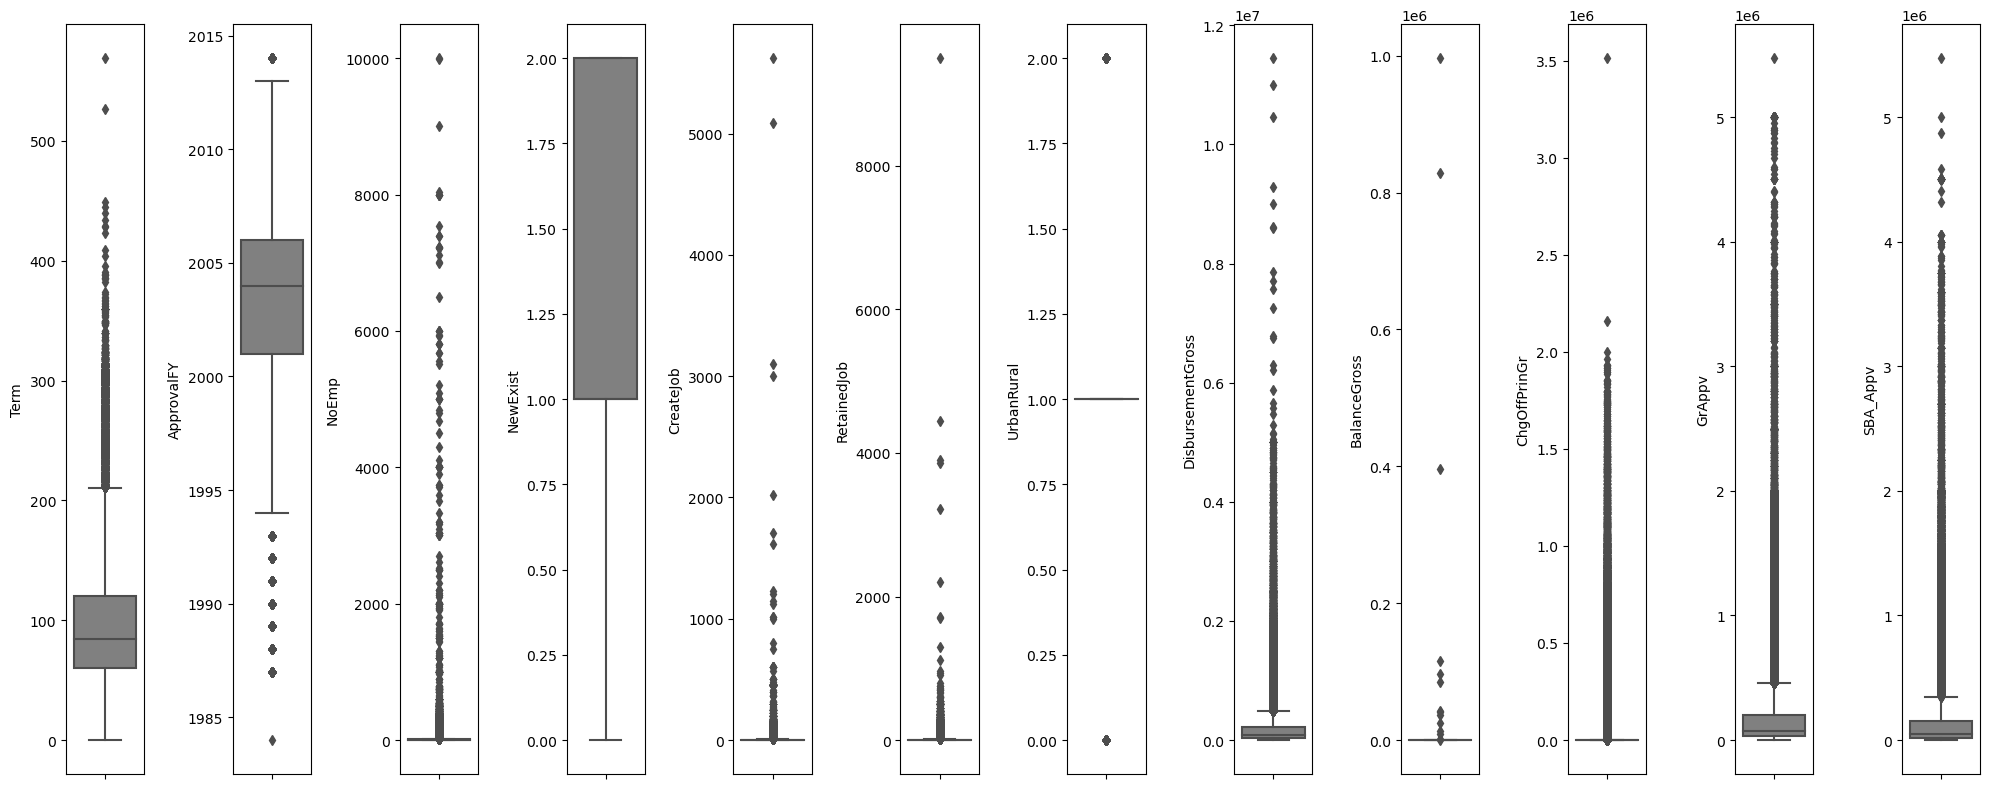

In [250]:
plt.figure(figsize=(20, 8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

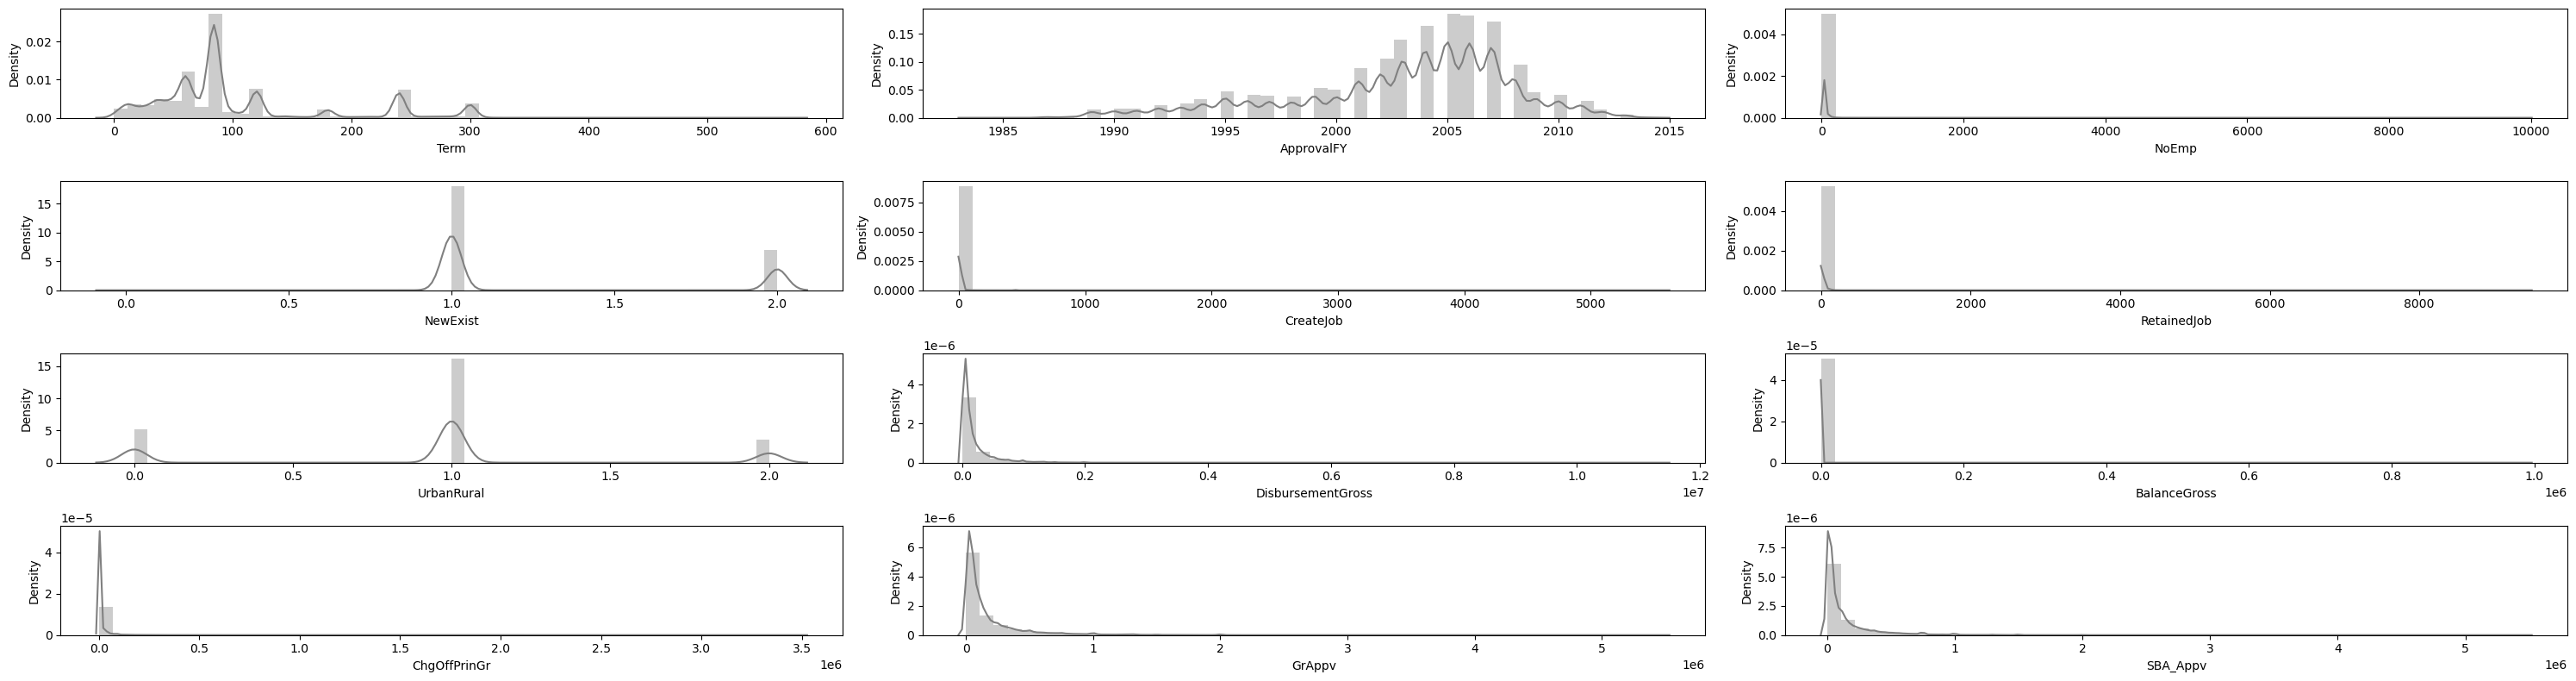

In [251]:
plt.figure(figsize=(30, 8))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

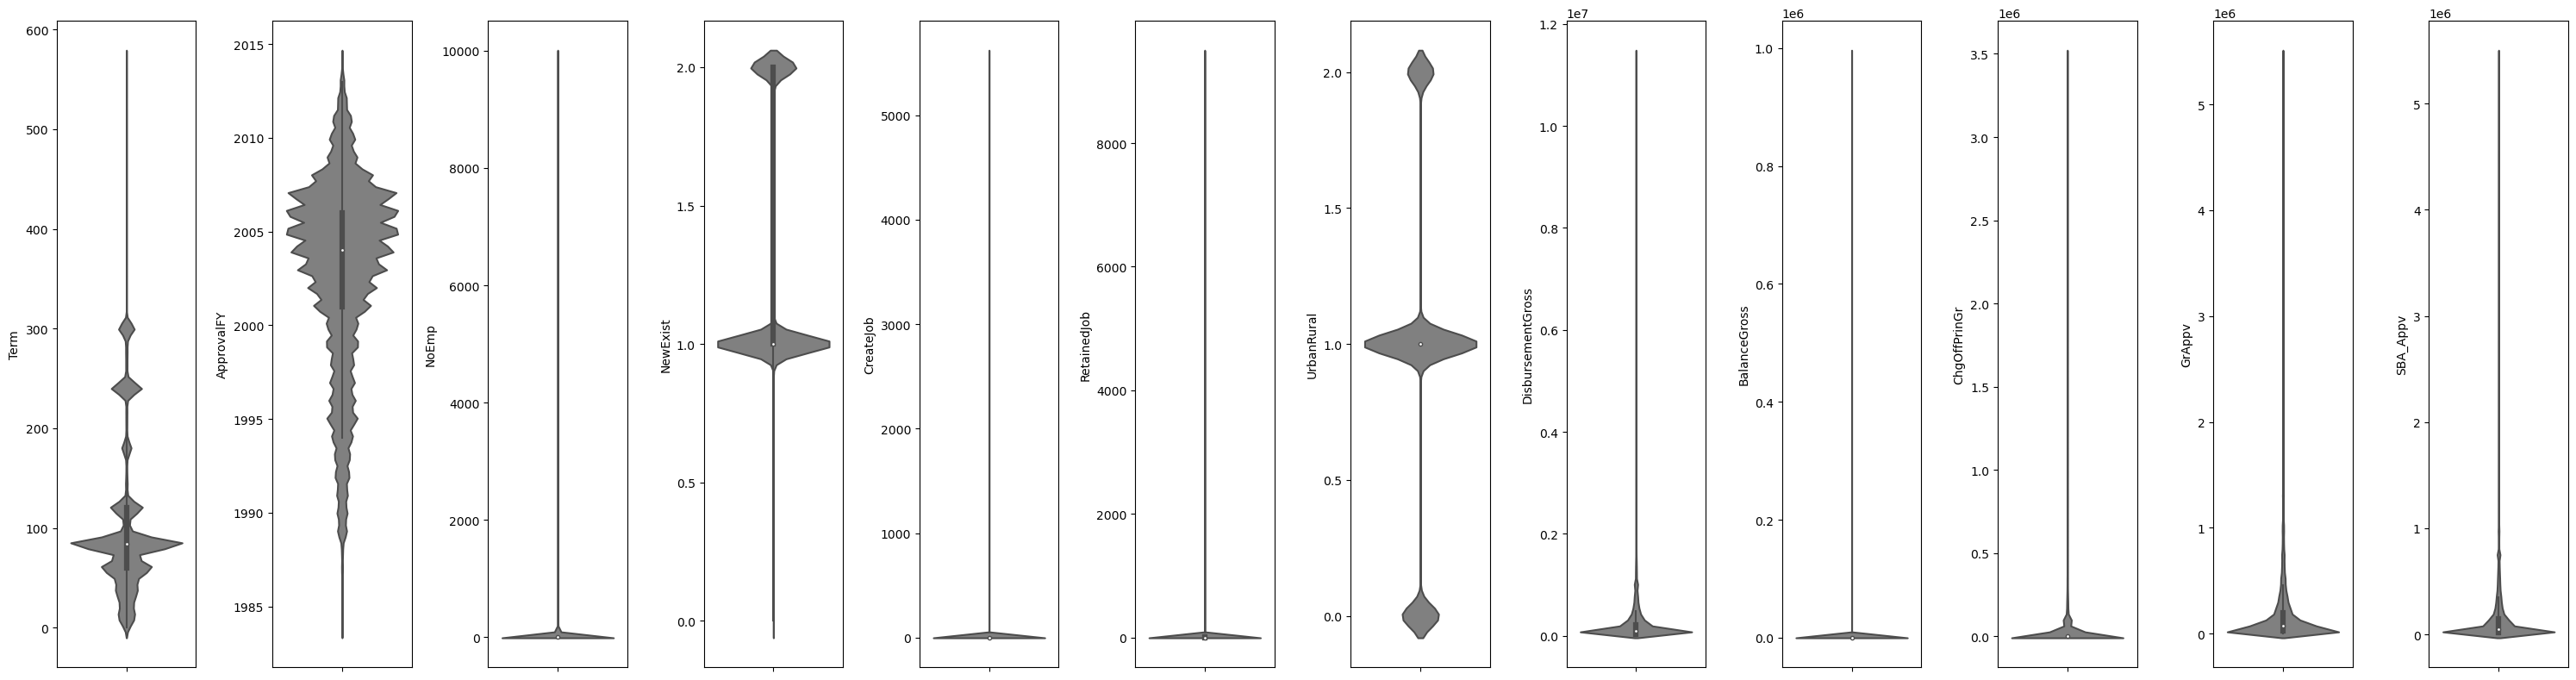

In [252]:
plt.figure(figsize=(30, 8))
for i in range(0, len(nums)):
    
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()
   

**Keterangan** : <br>
Berdasarkan visualisasi menggunakan **Violinplot, Displot, Boxplot** didapatkan hasil sebagai berikut: <br>
1. Variabel Term <br>
    Dari informasi diatas berdasarkan "displot" bisa kita lihat bahwa banyak peminjam memiliki term < 100. Memiliki distribusi plot multimodal. Variabel term berdistribusi secara positive skewness dan memiliki outliers ditandai dengan adanya plot titik-titik diatas garis whiskers. 
    
2. Variabel ApprovalFY (Tahun diterimanya/komitmen pinjaman) <br>
    Dari informasi diatas berdasarkan "displot" bisa kita lihat bahwa banyak peminjam terjadi pada tahun 2005.
   
2. Variabel NoEmp <br>
   Untuk variabel NoEmp terdapat banyak sekali outlier yaitu nilai > 1500, karena untuk kategori "Small Business" hanya memiliki jumlah maksimal karyawan diantara 250 - 1500. kemudian untuk distribusinya juga cenderung positive skewness. 

3. Variabel DisbursementGross* <br>
   Variabel DisbursementGross memiliki data yang nilai outlier & distribusinya juga cenderung positive skewness. 
   
4. Variabel BalanceGross* <br>
   Variabel BalanceGross memiliki data yang nilai outlier & distribusinya juga cenderung positive skewness. 

5. Variabel GrAppv* <br>
   Variabel GrAppv memiliki data yang nilai outlier & distribusinya juga cenderung positive skewness. 

6. Variabel SBAAppv* <br>
    Variabel SBAAppv memiliki data yang nilai outlier & distribusinya juga cenderung positive skewness. 
   
Dari penjelasan diatas bahwa kebanyakan variabel terdistribusi skewness positif yang banyak memiliki outlier. 

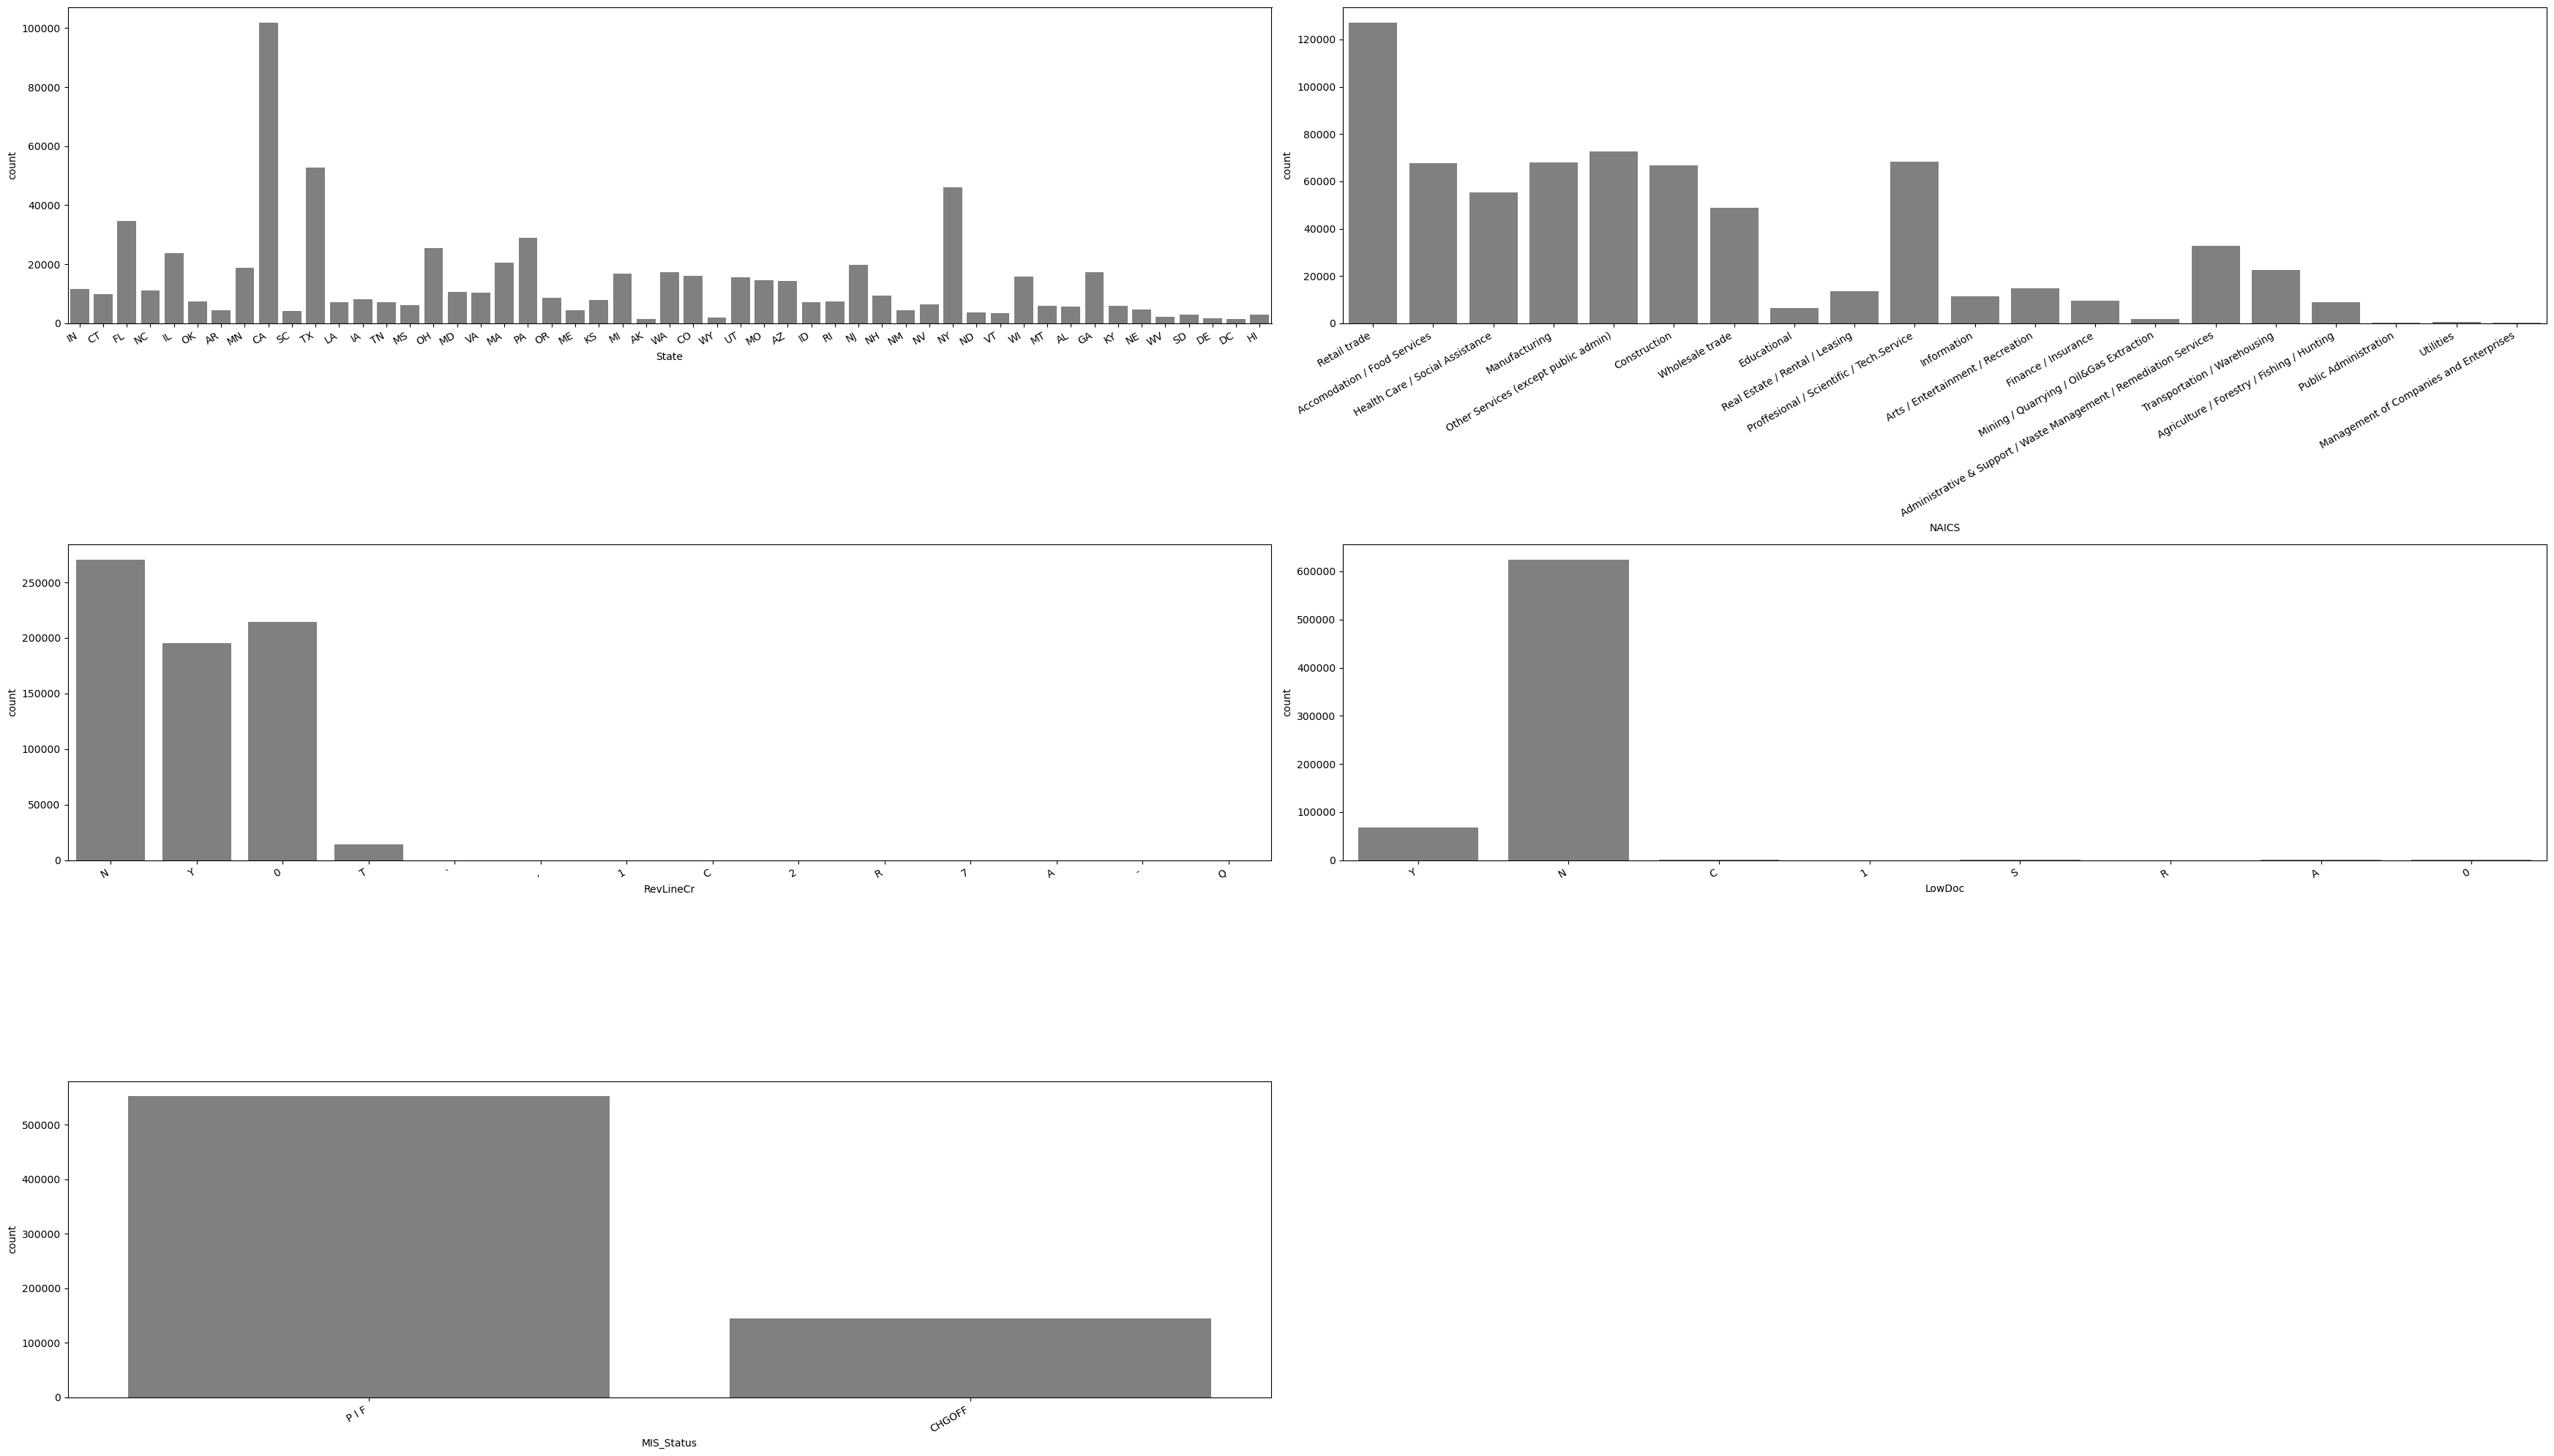

In [253]:
plt.figure(figsize=(35, 20))
for i in range(0, len(cats[4:])):
    plt.subplot(3, 2, i+1)
    sns.countplot(df[cats[4:][i]], color='gray', orient='h')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()

**Keterangan** : <br>


- jumlah distribusi data terbanyak berdasarkan kolom "State" terletak pada values/negara bagian "CA (California)"
- jumlah distribusi data terbanyak berdasarkan kolom "NAICS" terletak pada values/sektor industri "Retail Trade"

# 3. Multivariate Analysis

In [254]:
df.corr()

,LoanNr_ChkDgt,Zip,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,1.000000,0.034198,-0.247195,0.134239,0.015380,-0.052117,0.002204,-0.012612,0.057166,-0.111237,0.082766,0.000792,-0.046620,0.096547,0.103410
Zip,0.034198,1.000000,-0.029468,0.142243,0.014225,-0.030934,0.017485,0.013603,0.007949,-0.071450,0.091745,-0.000258,0.013244,0.099467,0.105731
ApprovalFY,-0.247195,-0.029468,1.000000,-0.261731,-0.040600,0.053217,0.026121,0.081323,0.008652,0.660628,-0.039678,0.001191,0.068234,-0.071244,-0.080390
Term,0.134239,0.142243,-0.261731,1.000000,0.043864,-0.061542,0.069104,0.022421,0.032464,-0.148438,0.469785,0.002291,-0.044025,0.511935,0.531290
NoEmp,0.015380,0.014225,-0.040600,0.043864,1.000000,-0.041321,0.055808,0.165926,0.005481,-0.030338,0.097344,-0.000108,0.010704,0.098531,0.099022
NewExist,-0.052117,-0.030934,0.053217,-0.061542,-0.041321,1.000000,0.025395,-0.071437,0.118914,0.045200,-0.070679,0.001566,0.020738,-0.061288,-0.058111
CreateJob,0.002204,0.017485,0.026121,0.069104,0.055808,0.025395,1.000000,0.107211,0.029340,0.019873,0.102272,-0.000041,0.023467,0.104371,0.120642
RetainedJob,-0.012612,0.013603,0.081323,0.022421,0.165926,-0.071437,0.107211,1.000000,0.006383,0.052107,0.123332,-0.000395,0.032460,0.115061,0.108444
FranchiseCode,0.057166,0.007949,0.008652,0.032464,0.005481,0.118914,0.029340,0.006383,1.000000,0.029054,0.060193,-0.000177,0.033219,0.069876,0.072826
UrbanRural,-0.111237,-0.071450,0.660628,-0.148438,-0.030338,0.045200,0.019873,0.052107,0.029054,1.000000,-0.016202,0.002109,0.048049,-0.033793,-0.039488


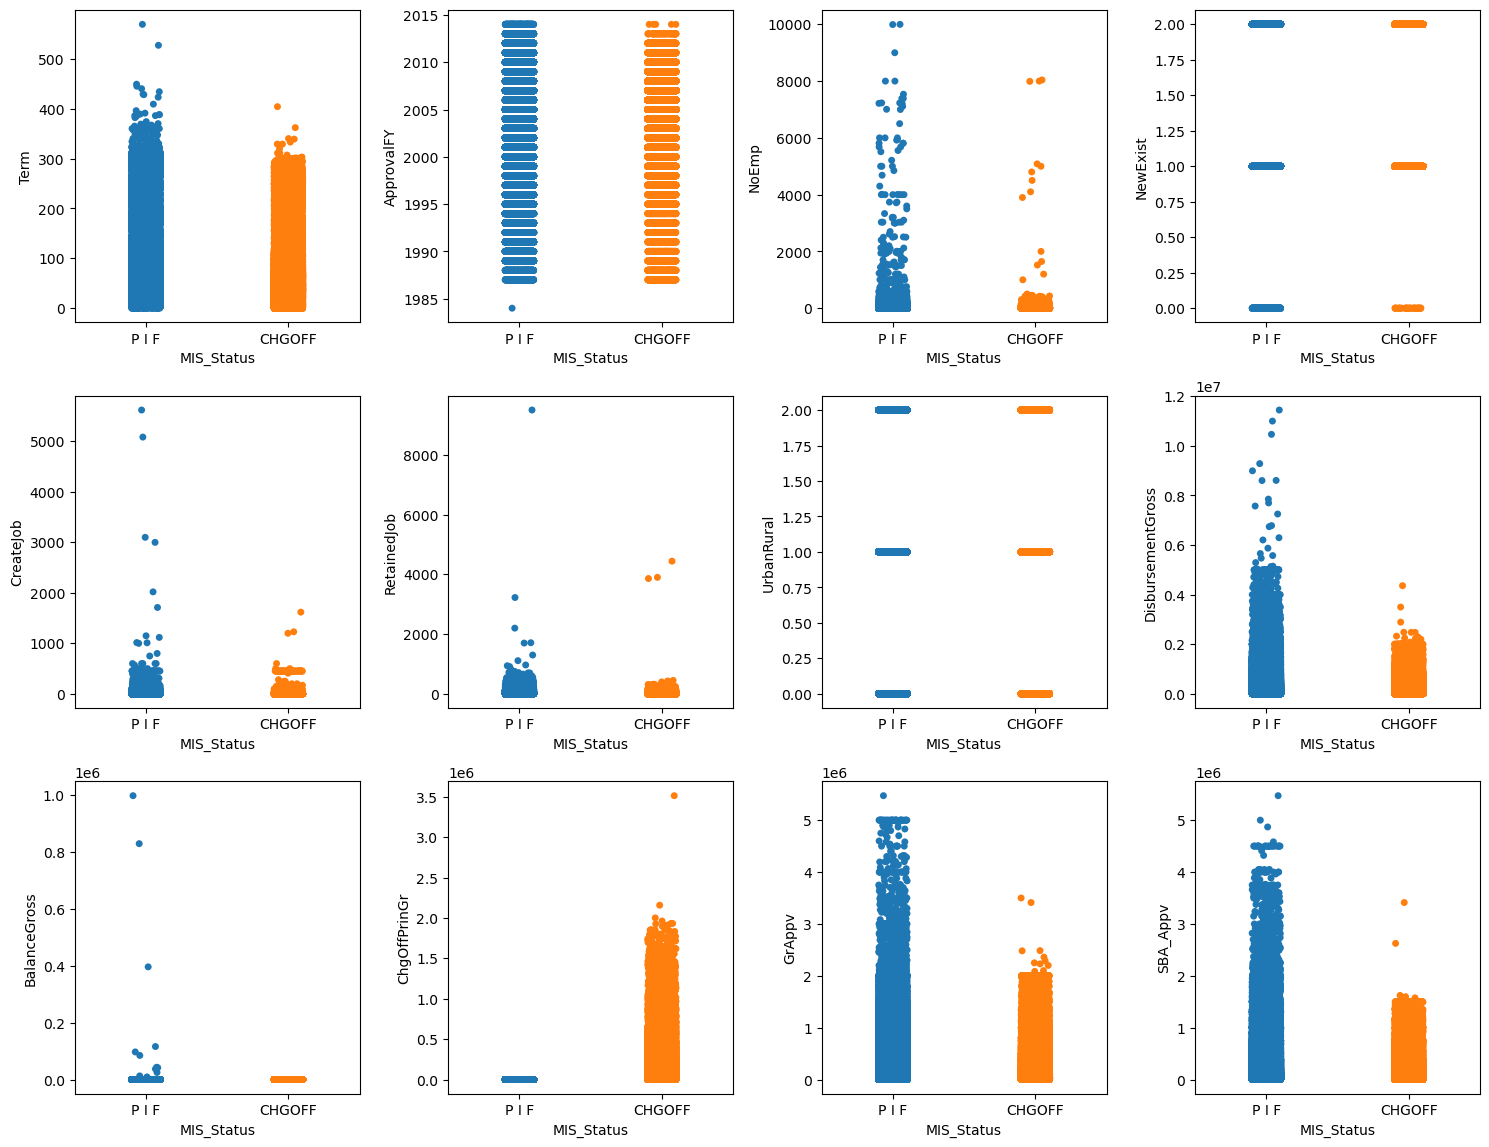

In [255]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='MIS_Status', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

**Keteranagan**:<br>
- semakin besar GrAppv, SBA_Appv, DisbursementtGross, Term & NoEmp semakin kecil tingkat CHGOFF (gagal bayar)

In [207]:
# ubah values target menjadi numeric agar bisa dilihat korelasinya terhadap feature target
df['MIS_Status'] = np.where(df['MIS_Status'] == 'P I F', 1, 0)

In [208]:
df.sample(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
101581,1750354010,LARRY & KATHY BAKER,GLENDALE,AZ,85306,WELLS FARGO BANK NATL ASSOC,SD,Manufacturing,1997-12-18,1998,300,20,1.0,0,0,1,0,0,N,NaN,1998-03-31,121500.0,0.0,1,0.0,121500.0,91125.0
547262,5368514007,LEFEVER BUILDING SYSTEMS,WIGGINS,CO,80654,KEYBANK NATIONAL ASSOCIATION,OH,Construction,2002-04-30,2002,120,18,1.0,2,20,1,1,0,N,NaN,2002-06-30,680000.0,0.0,1,0.0,680000.0,510000.0
154340,2123796000,TNT FAST TUBE,SELMA,CA,93662,MUFG UNION BANK NATL ASSOC,CA,Other Services (except public admin),2006-06-06,2006,120,6,1.0,0,6,1,1,0,N,NaN,2006-06-30,176000.0,0.0,1,0.0,176000.0,132000.0
192126,2359246006,INTERNATIONAL DISCOUNT GOLF,MODESTO,CA,95350,WESTAMERICA BANK,CA,Retail trade,2006-08-25,2006,93,3,1.0,0,3,1,1,0,N,13-Oct-09,2006-10-31,120000.0,0.0,0,103692.0,120000.0,102000.0
147686,2078795004,"Stepanian, LLC",SIMSBURY,CT,6070,BANK OF AMERICA NATL ASSOC,NC,Arts / Entertainment / Recreation,2006-10-19,2007,84,4,2.0,0,4,0,1,Y,N,NaN,2007-08-31,6000.0,0.0,1,0.0,5000.0,2500.0
241884,2706604010,MARKETS' MINI BAZAAR,SAN DIEGO,CA,92120,MUFG UNION BANK NATL ASSOC,CA,Retail trade,1999-01-13,1999,300,3,1.0,0,0,1,0,N,N,NaN,1999-02-28,111000.0,0.0,1,0.0,111000.0,83250.0
839343,8999234006,SOUTHWEST FLOORING INSTALLATIO,ALBUQUERQUE,NM,87109,WELLS FARGO BANK NATL ASSOC,SD,Construction,2005-07-21,2005,26,1,1.0,0,1,1,1,Y,N,31-Jul-10,2005-08-31,84763.0,0.0,0,34998.0,35000.0,17500.0
113025,1826695000,"DJA Plumbing HVAC, Inc.",New Holland,PA,17557,NATIONAL PENN BANK,PA,Construction,2006-05-18,2006,87,17,2.0,0,17,0,1,N,N,NaN,2006-10-31,550000.0,0.0,1,0.0,550000.0,412500.0
116496,1852245009,HOWARD AND HONEYCUTT FURNITURE,KANNAPOLIS,NC,28083,CAPITAL ONE NATL ASSOC,VA,Retail trade,2006-06-02,2006,47,11,1.0,0,11,0,1,N,N,6-Feb-10,2006-06-30,75000.0,0.0,0,54718.0,75000.0,37500.0
460629,4453455009,"Zarbana Industries, Inc.",Columbiana,OH,44408,HOME SAVINGS & LOAN CO OF YOU,OH,Manufacturing,2010-12-20,2011,60,34,1.0,14,34,0,1,Y,N,NaN,2012-01-01,1280000.0,0.0,1,0.0,1000000.0,500000.0


### Spearman Method

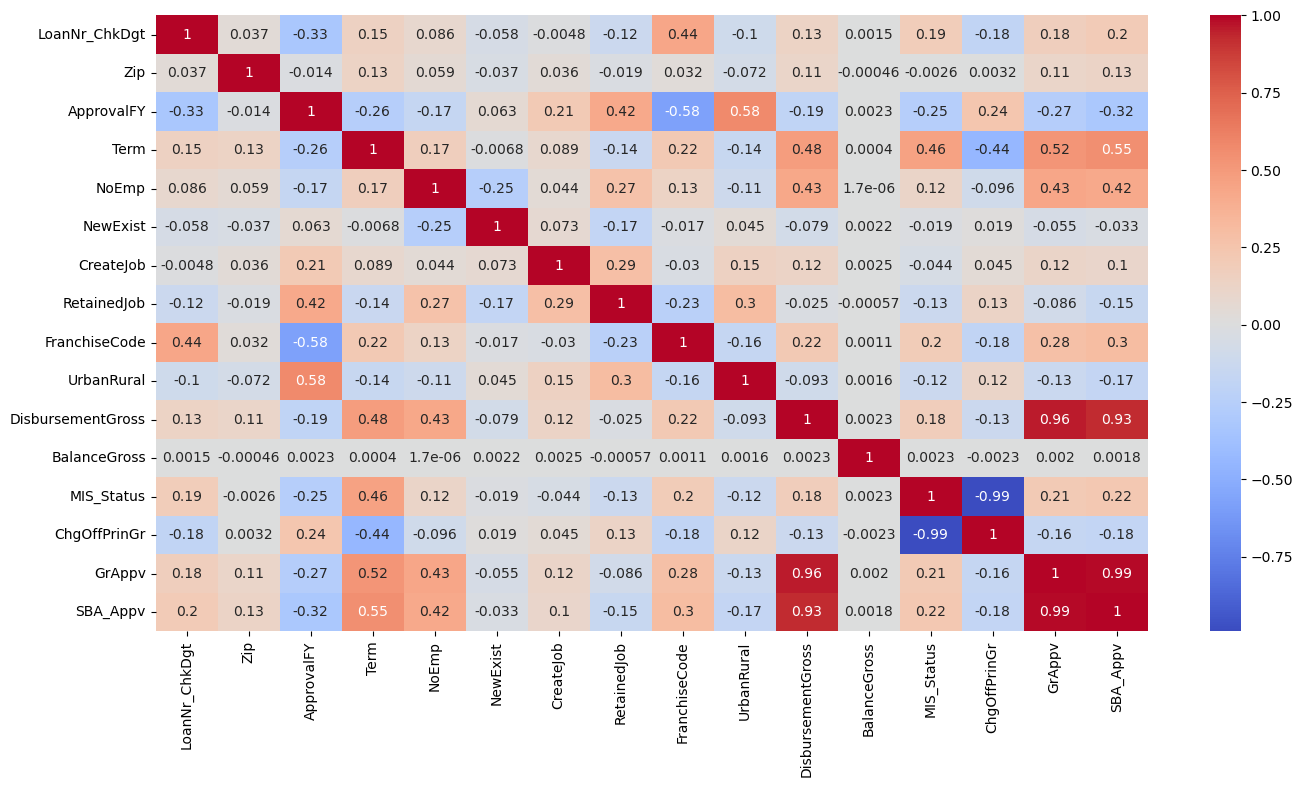

In [209]:
#spearman method
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(method = 'spearman'), cmap='coolwarm', annot=True)
plt.show()

### Pearson Method

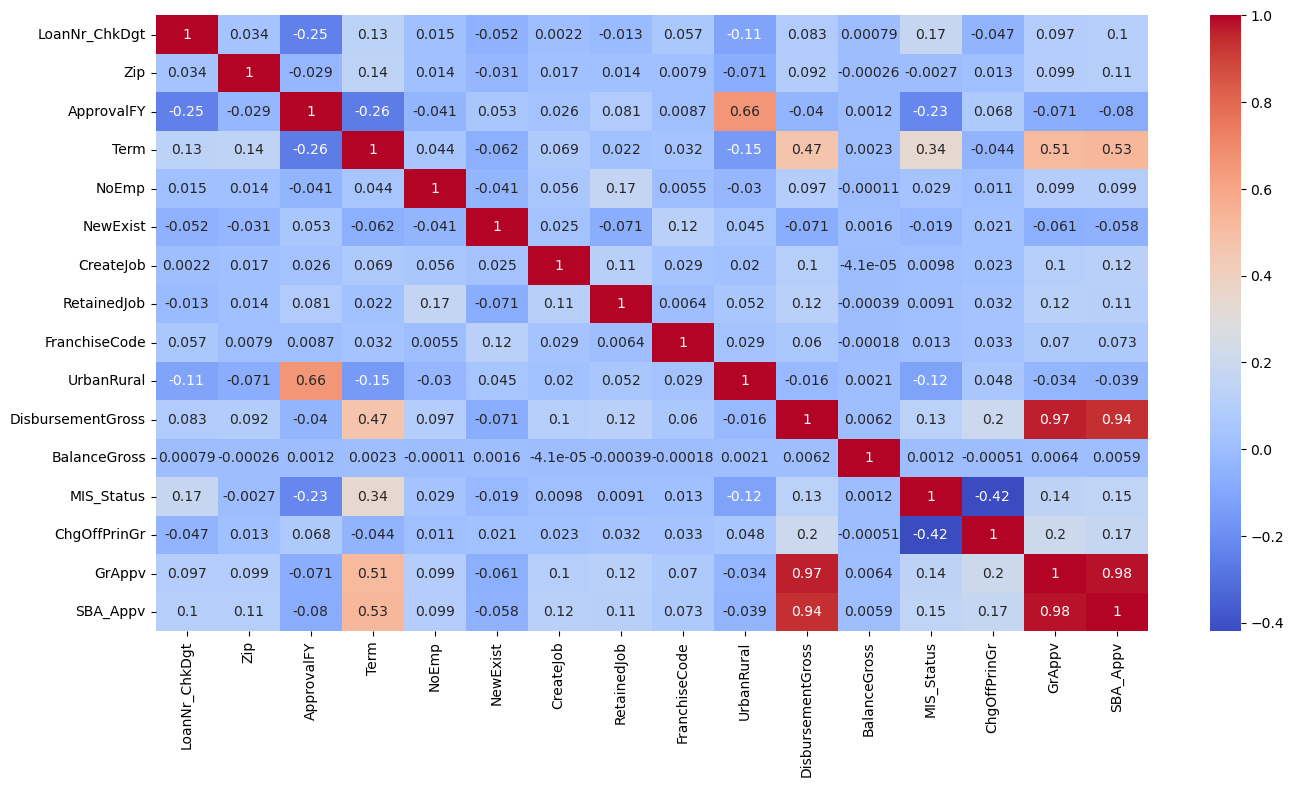

In [210]:
#pearson method
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(method = 'pearson'), cmap='coolwarm', annot=True)
plt.show()

**Keterangan** :
- Heatmap diatas juga terdapat low correlation terhadap feature target **MIS_Status** dengan kolom **Term** yaitu sebesar 0.34 untuk pearson &  0.46 untuk method spearman.
- Kolom "Term" juga memiliki korelasi terhadap **"SBA_APPV"** & **"GrAppv"**, untuk person method memiliki korelasi sebesar 0.53 & 0.51, sedangkan untuk spearman method sebesar 0.55 & 0.52

untuk selanjutnya agar hasil korelasi dalam heatmap akurat perlu dilakukan data preprocessing terlebih dahulu, hal ini juga untuk menentukan variabel mana yang dapat dimasukan kedalam model

# 4. Bussiness Insight
Pada Business Insight ini kami membuat beberapa variabel dummy dan sedikit merubah bentuk data yang seharusnya terjadi pada stage preprocessing.

In [211]:
# Mengubah kembali values target menjadi object
df['MIS_Status'] = np.where(df['MIS_Status'] == 1, 'P I F', 'CHGOFF')

## 4.1. Pengaruh "MIS_Status" (Status Pinjaman) terhadap "ApprovalFY" (Tahun diterimanya Pinjaman)

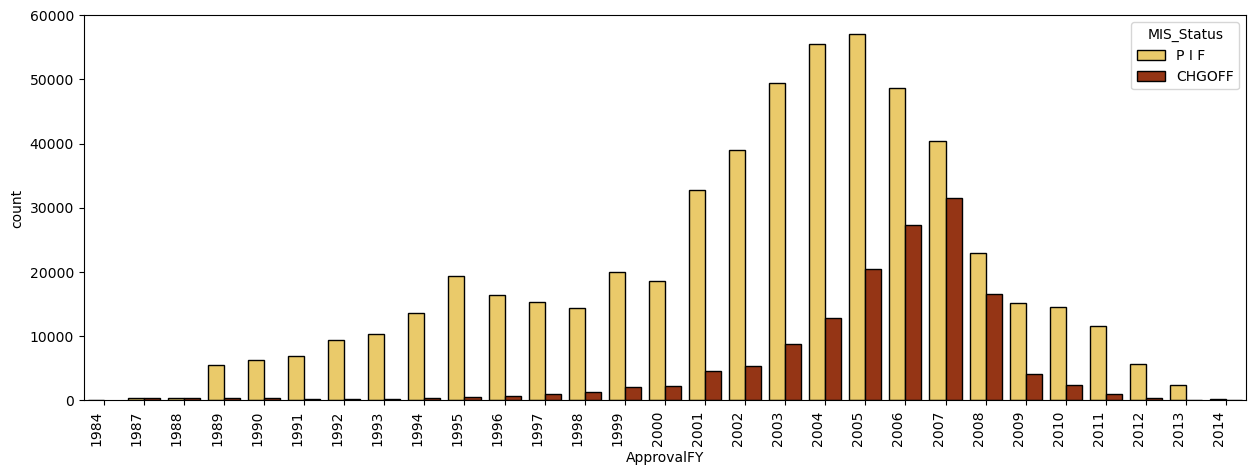

In [212]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='ApprovalFY',hue='MIS_Status',   palette = 'afmhot_r', 
            lw = 1, ec = 'k')
plt.xticks(rotation=90, ha='right')
plt.show()

**Keterangan :**<br>
Dari Informasi diatas dapat dilihat bahwa tingkat gagal bayar (CHGOFF) paling banyak terletak pada tahun "2007" dan hal ini terjadi pada saat dimulainya "great recession 2007 -2009". jadi masuk akal jika tingkat gagal bayar (CHGOFF) tinggi.
- Sumber : https://www.bls.gov/spotlight/2012/recession/

#### Mari kita lihat tingkat gagal bayar berdasarkan State(Negara Bagian) selama tahun "2007"

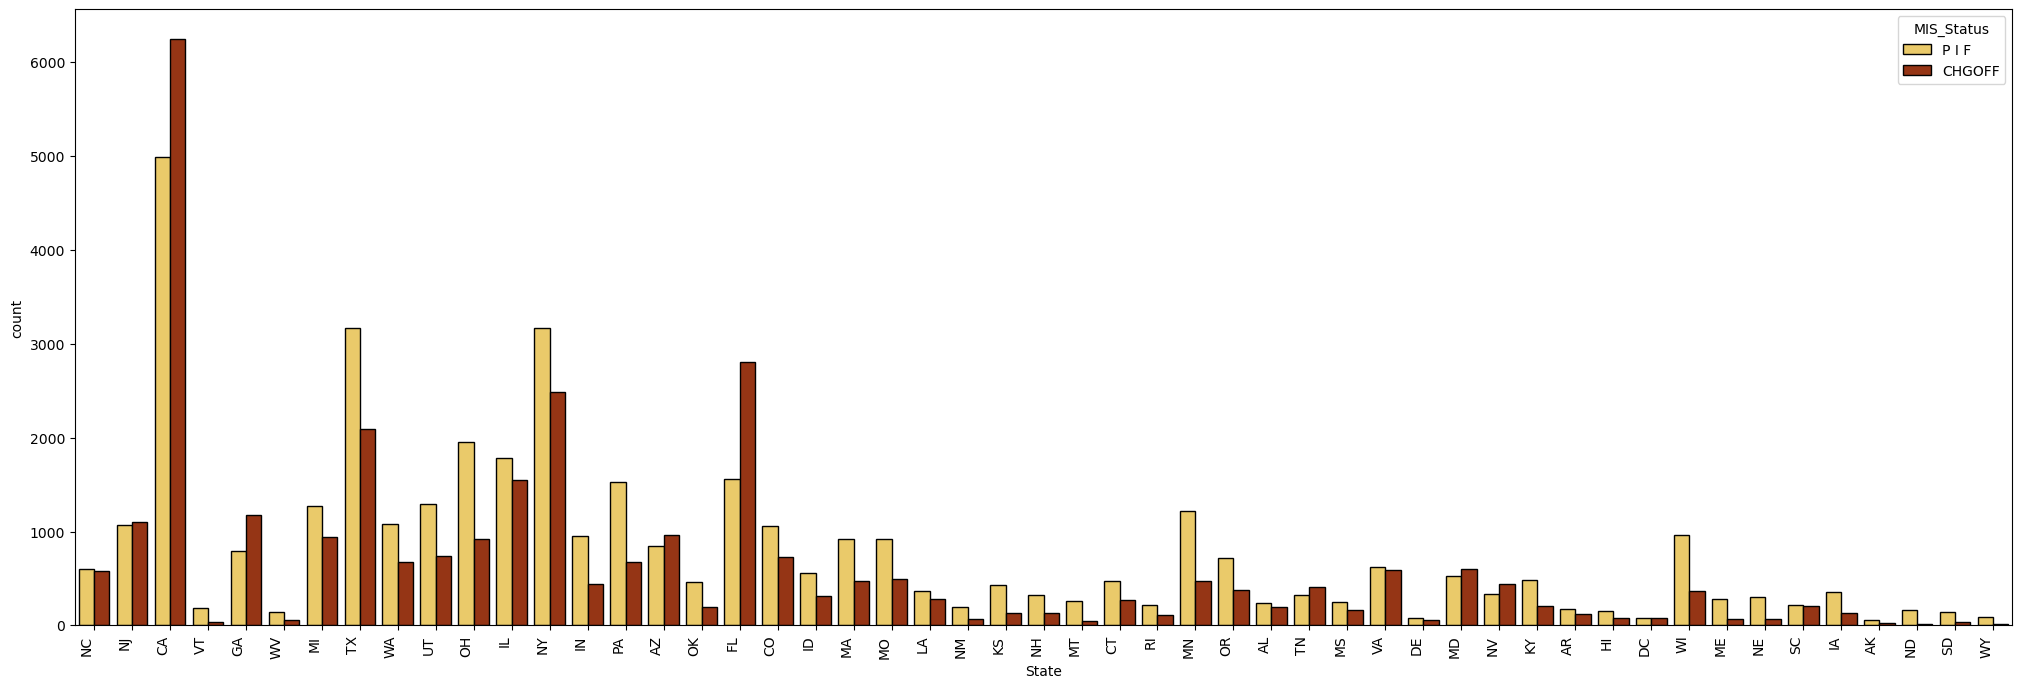

In [213]:
plt.figure(figsize=(25,8))
sns.countplot(data=df[df['ApprovalFY'] == 2007],x='State',hue='MIS_Status',  palette = 'afmhot_r', 
            lw = 1, ec = 'k')
plt.xticks(rotation=90, ha='right')
plt.show()

**Keterangan :**<br>
Ternyata terdapat **"State"** (Negara Bagian) yang tingkat gagal bayarnya **(CHGOFF)** cukup signifikan melebihi tingkat berhasil bayar **(P I F)**, terlihat dari plot diatas yaitu state **"CA", "AZ","FL", "GA" & "MD"**

#### Mari kita lihat tingkat gagal bayar dari sektor industri selama tahun "2007"

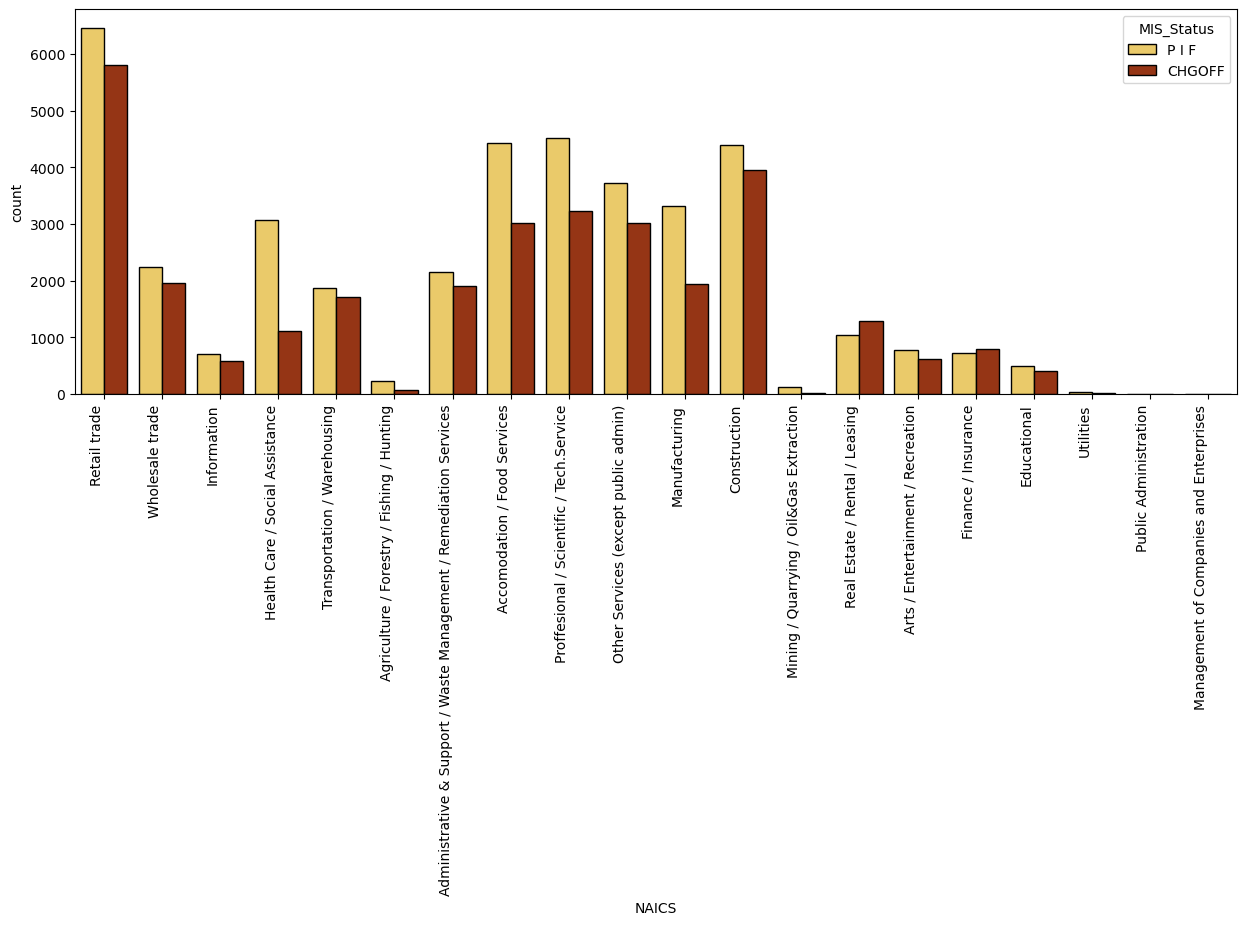

In [214]:
plt.figure(figsize=(15,5))
sns.countplot(data=df[df['ApprovalFY'] == 2007],x='NAICS',hue='MIS_Status',  palette = 'afmhot_r', 
            lw = 1, ec = 'k')
plt.xticks(rotation=90, ha='right')
plt.show()

Ada hal yang menarik disini, terlihat bahwa sector industri **"Healt Care/Social Assistance"** memiliki tingkat gagal bayar yang kecil, yang berarti dari **"sektor industri"** tersebut tidak terlalu banyak mempengaruhi resiko gagal bayar selama resesi ekonomi.

#### Dari penjelasan diatas kita dapat memberikan rekomendasi business jika terjadi resesi: <br>
- SBA perlu menambahkan persyaratan kredit yang lebih ketat, SBA dapat menetapkan standar kredit yang lebih ketat untuk meminimalkan risiko gagal bayar. Persyaratan kredit yang ketat dapat memastikan bahwa hanya bisnis terbaik dari **"State" & "Sektor Industri"** terbaiklah yang memenuhi syarat untuk mendapatkan pinjaman dan lebih mampu membayar kembali pinjaman selama masa resesi ekonomi.
- Sebagai lembaga pemerintah SBA juga berperan untuk membantu memulihkan ekonomi selama resesi yaitu dengan meningkatkan edukasi keuangan melalui program konseling SBA, seingga dapat meningkatkan edukasi keuangan bagi bisnis kecil untuk membantu mereka memahami risiko dan cara mengelola keuangan mereka selama masa resesi ekonomi. Edukasi keuangan dapat membantu bisnis kecil mengambil keputusan yang lebih baik dalam pengelolaan keuangan mereka dan meminimalkan risiko gagal bayar.

## 4.2. Pengaruh "MIS_Status" (Status Pinjaman) terhadap "Term" (Jangka Waktu Pinjaman)


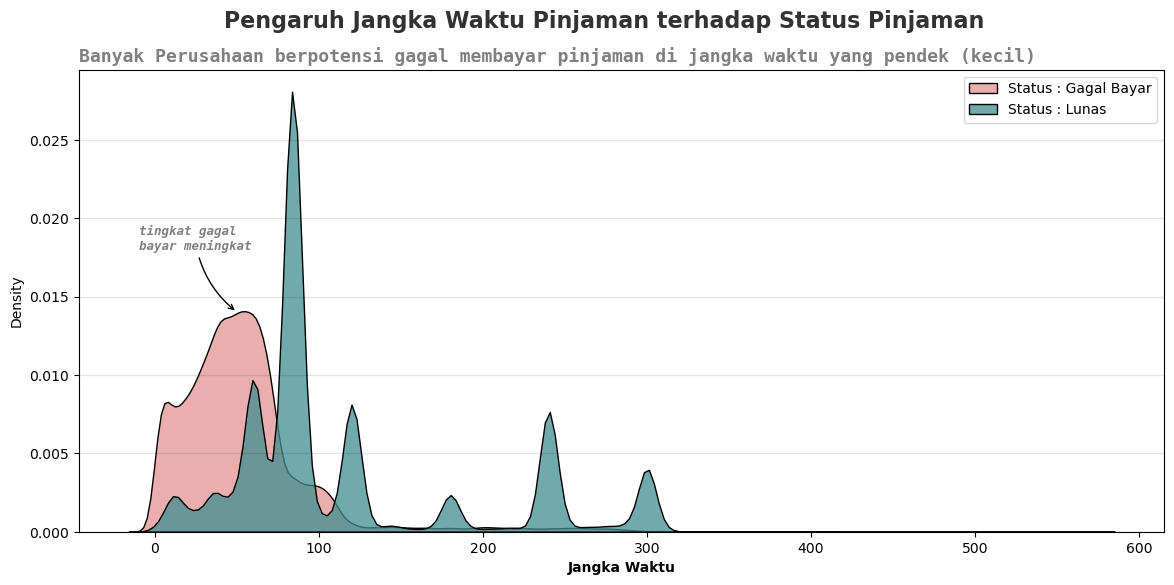

In [73]:
#create column
CHGOFF = df[df['MIS_Status'] == 'CHGOFF']
PIF = df[df['MIS_Status'] == 'P I F']

fig, ax = plt.subplots(1, 1, figsize = (14, 6))

sns.kdeplot(x = 'Term', data = CHGOFF, label = 'Status : Gagal Bayar', 
            color = '#E49393', fill = True, multiple = 'stack', ax = ax)

sns.kdeplot(x = 'Term', data = PIF, label = 'Status : Lunas',
            color = '#408E91', fill = True, multiple = 'stack', ax = ax)

fig.suptitle("Pengaruh Jangka Waktu Pinjaman terhadap Status Pinjaman", fontsize=16, fontweight='bold', family='sansserif', color='#323232')
plt.title('Banyak Perusahaan berpotensi gagal membayar pinjaman di jangka waktu yang pendek (kecil)', fontsize=13, fontweight='bold', family='monospace', color='grey', loc ='left')
plt.annotate('tingkat gagal\nbayar meningkat', fontstyle='italic',  fontname='monospace', color ='grey',fontweight='bold', fontsize=9,xy=(50,0.014),arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'),xytext=(-10,0.018))
ax.grid(c = 'black', lw = 1, axis = 'y', alpha = 0.1)
ax.set_xlabel('Jangka Waktu',  weight = 'bold')
ax.legend()

plt.show()

**Keterangan :**<br>
dari plot diatas terlihat bahwa tingkat resiko gagal bayar banyak terjadi dijangka waktu **(Term)** yang pendek < 100. hal ini juga menyatakan bahwa semakin lama jangka waktu yang diberikan, semakin besar juga kemungkinan bisnis dapat berkembang dan hal ini dapat mengurangi resiko gagal bayar.

#### Akan tetapi kami menemukan sumber terkait Jangka Waktu **"(Term)"** 
> sumber : https://www.sba.gov/partners/lenders/7a-loan-program/terms-conditions-eligibility
- pinjaman yang didukung/dijamin oleh properti biasanya memiliki durasi 25 tahun atau lebih (300 bulan) dan merupakan satu-satunya pinjaman yang diberikan untuk jangka waktu yang begitu lama, sedangkan pinjaman yang tidak dijamin oleh properti biasanya memiliki durasi kurang dari 25 tahun (<300 bulan).sehingga kami melakukan segmentasi terhadap variabel **"Term"** dengan membuat varibael baru bernama **RealEstate**, di mana **"RealEstate" = 1 jika "Term" (≥ 300 bulan) dan "RealEstate" = 0 jika "Term" < 300 bulan.**

In [215]:
#membuat kolom realestate
df['RealEstate'] = 0
df.loc[df['Term'] >= 300, 'RealEstate'] = 1

In [216]:
#cek kolom apakah sudah sesuai
re = df[['Term', 'RealEstate']]
re[re['RealEstate']==1].sample(3)

,Term,RealEstate
359245,300,1
67516,300,1
710170,300,1


In [217]:
df1 = df.groupby(['RealEstate', 'MIS_Status']).agg(Jumlah_Peminjam=('LoanNr_ChkDgt', 'count')).reset_index()
df2 =  df.groupby('RealEstate').agg(Jumlah_Total_Peminjam=('MIS_Status', 'count')).reset_index()
df_merge = df1.merge(df2, on = 'RealEstate')

# Menambah Kolom Rasio
df_merge['Rasio'] = round (df_merge['Jumlah_Peminjam'] / df_merge['Jumlah_Total_Peminjam'] * 100,2)

#ubah nama data
df_merge['RealEstate'] = df_merge['RealEstate'].replace({0: 'Lainnya', 1: 'Real Estate'})

df_merge

,RealEstate,MIS_Status,Jumlah_Peminjam,Jumlah_Total_Peminjam,Rasio
0,Lainnya,CHGOFF,145171,666802,21.77
1,Lainnya,P I F,521631,666802,78.23
2,Real Estate,CHGOFF,36,30414,0.12
3,Real Estate,P I F,30378,30414,99.88


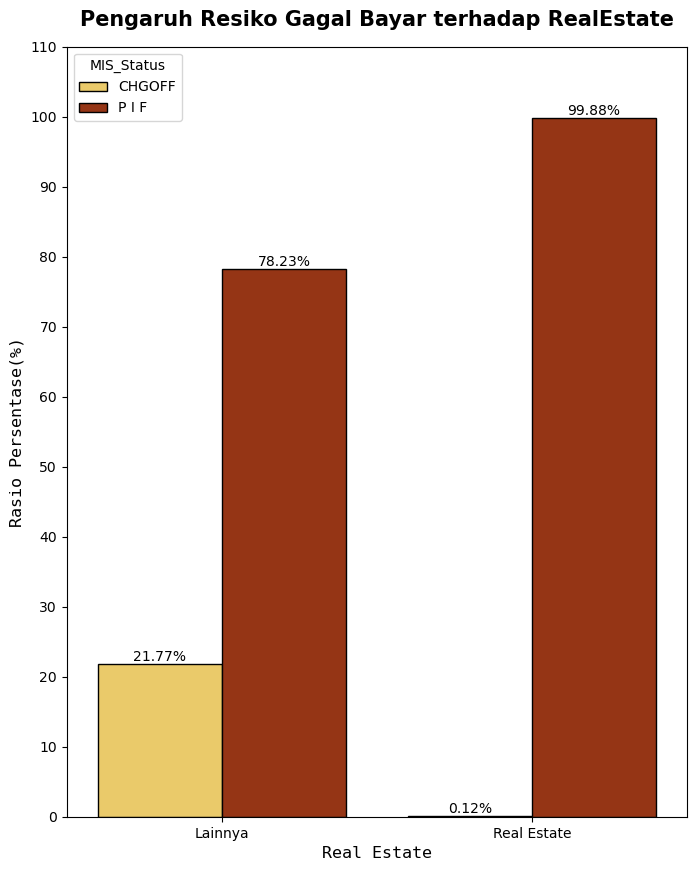

In [218]:
import seaborn as sns
# Membuat plot
plt.figure (figsize = (8, 10))
sns.barplot(x ='RealEstate', y = 'Rasio', hue = 'MIS_Status', data = df_merge, palette = 'afmhot_r', lw = 1, ec = 'k')

# Memberi judul pada plot dan sumbu-sumbunya
plt.title('Pengaruh Resiko Gagal Bayar terhadap RealEstate', fontsize=15, fontweight='bold', pad = 15, family='sansserif')
plt.xlabel('Real Estate', fontsize = 12, fontname='monospace')
plt.ylabel('Rasio Persentase(%)', fontsize = 12,fontname='monospace')
plt.text(x=-0.20, y=22.77, s='21.77%', ha='center', va='center', fontsize=10)
plt.text(x=0.20, y=79.23, s='78.23%', ha='center', va='center', fontsize=10)
plt.text(x=0.80, y=1.12, s='0.12%', ha='center', va='center', fontsize=10)
plt.text(x=1.20, y=100.88, s='99.88%', ha='center', va='center', fontsize=10)
plt.yticks(range(0, 120, 10)) 


# Menampilkan plot
plt.show()

**Keterangan:** <br>
terlihat bahwa "RealEstate"(Kepemilikan Properti) memiliki tingkat gagal bayar sangat rendah yaitu hanya sebesar 0.12%, ini menandakan bahwa nilai dari properti tersebut seringkali cukup besar untuk menutupi jumlah pokok yang masih belum dibayar, sehingga mengurangi kemungkinan terjadinya gagal bayar.

#### Dari penjelasan diatas kita dapat memberikan rekomendasi business: <br>
- Perusahaan yang dijamin oleh properti (real estate) dengan jangka waktu lebih dari 300 bulan memiliki tingkat gagal bayar yang sangat rendah, hal ini menandakan SBA dapat memberikan dukungan dalam bentuk penjaminan pinjaman untuk membantu perusahaan tersebut. Namun, SBA tetap perlu memonitor kinerja perusahaan dan mengawasi penggunaan dana pinjaman dengan baik. SBA juga dapat memberikan bimbingan dan konseling kepada perusahaan untuk membantu mereka meningkatkan kinerja dan pertumbuhan bisnis mereka.

# 4.3. Pengaruh State (Negara Bagian) terhadap tingkat gagal bayar (CHGOFF)

In [219]:
# -- import csv that contain state name
states = pd.read_csv('states.csv')
states.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


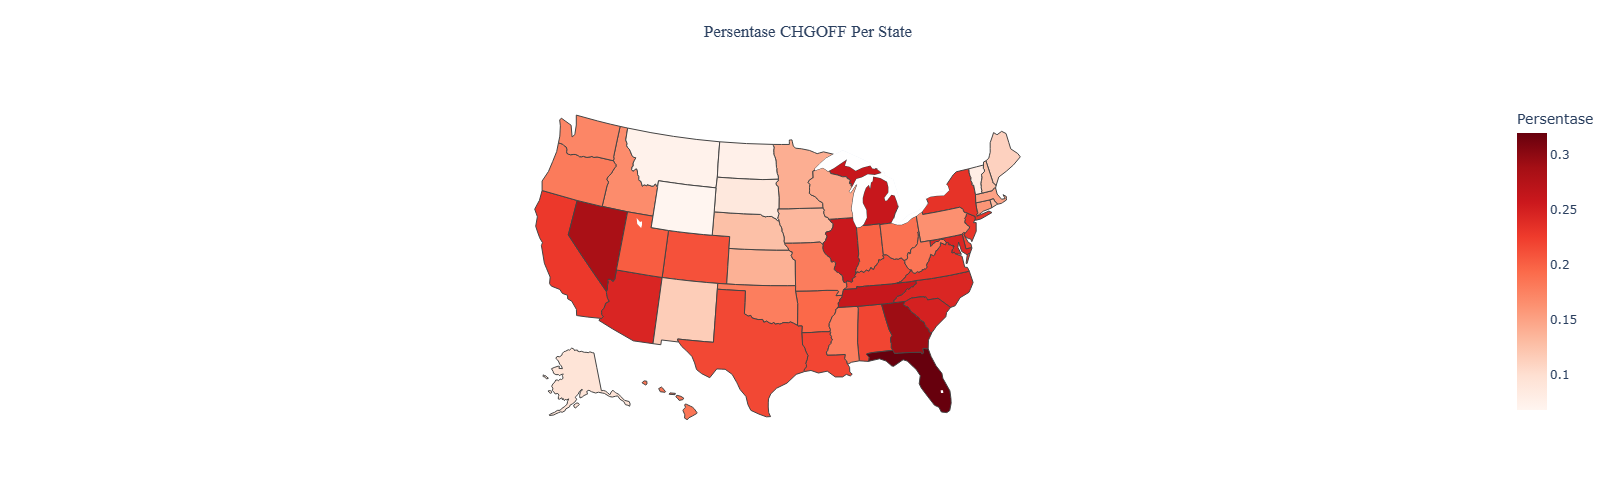

In [220]:
# -- percentage of CHGOFF based on state
gb1 = df[df['MIS_Status'] == 'CHGOFF'].groupby('State').count()[['MIS_Status']].reset_index()
gb2 = df[df['MIS_Status'] == 'P I F'].groupby('State').count()[['MIS_Status']].reset_index()
gb_state = pd.merge(gb1,gb2,on='State')
gb_state.rename(columns={'MIS_Status_x':'CHGOFF','MIS_Status_y':'P I F'},inplace=True)

def percent(x):
    a = x['CHGOFF'] / (x['P I F'] + x['CHGOFF'])
    return round(a,3)
gb_state['Percent'] = gb_state.apply(percent,axis=1)


# -- Input State Name based on state code
def apply_name_states(x) :
    return states[states['Code'] == x['State']]['State'].values[0]

gb_state['StateName'] = gb_state.apply(apply_name_states,axis=1)
df_state_MIS = gb_state.copy()


# -- Chloropleth
fig = go.Figure(data=go.Choropleth(
    locations=df_state_MIS['State'], # Spatial coordinates
    z = df_state_MIS['Percent'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    text = df_state_MIS['StateName'],
    colorbar_title = "Persentase",
))

fig.update_layout(
    title={
        'text': "Persentase CHGOFF Per State",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'family': 'sansserif',
        }
    },
    geo_scope='usa', # limite map scope to USA
    height=500,
    width=700
)

fig.show()

**Keterangan**:<br>
Berdasarkan visualisasi mapping diatas dapat disimpulkan bahwa setiap **State** (Negara Bagian) memiliki tingkat resiko gagal bayar **(CHGOFF)** yang berbeda, hal ini juga menandakan bahwa ekonomi masing masing **State** berbeda.

#### Dari penjelasan diatas kita dapat memberikan rekomendasi business: <br>
- Mempertimbangkan kondisi ekonomi setiap state. SBA dapat mempertimbangkan kondisi ekonomi setiap state ketika menetapkan persyaratan dan kriteria untuk program penjaminan pinjaman. Ini dapat membantu SBA mengidentifikasi risiko kredit yang berbeda-beda antara state.
- Membuat laporan risiko kredit berbasis state. SBA dapat membuat laporan risiko kredit berbasis state untuk membantu lender dan pemohon pinjaman memahami risiko kredit yang berbeda-beda antara state. Ini dapat membantu lender dan pemohon pinjaman dalam mengambil keputusan yang lebih baik dan meminimalkan risiko gagal bayar.